In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve


# Configuraciones generales

plt.rcParams['figure.figsize'] = (10, 6)


In [75]:
# 1. Cargar el archivo CSV

data = pd.read_csv("../resources/weight-height.csv")

# Mostramos una muestra de los datos para verificar
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [77]:
data.describe(include='all')

,Gender,Height,Weight
count,10000,10000.000000,10000.000000
unique,2,NaN,NaN
top,Male,NaN,NaN
freq,5000,NaN,NaN
mean,NaN,66.367560,161.440357
std,NaN,3.847528,32.108439
min,NaN,54.263133,64.700127
25%,NaN,63.505620,135.818051
50%,NaN,66.318070,161.212928
75%,NaN,69.174262,187.169525


array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

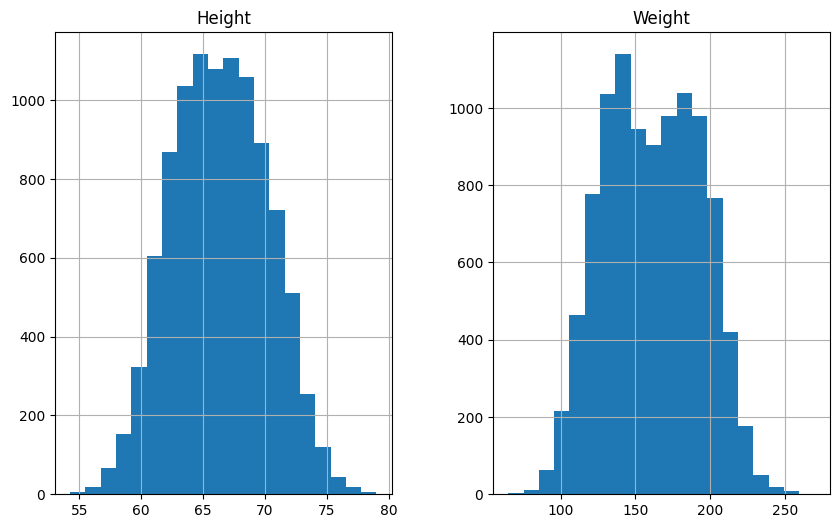

In [78]:
data.hist(bins=20)

<Axes: title={'center': 'Weight'}, xlabel='Gender'>

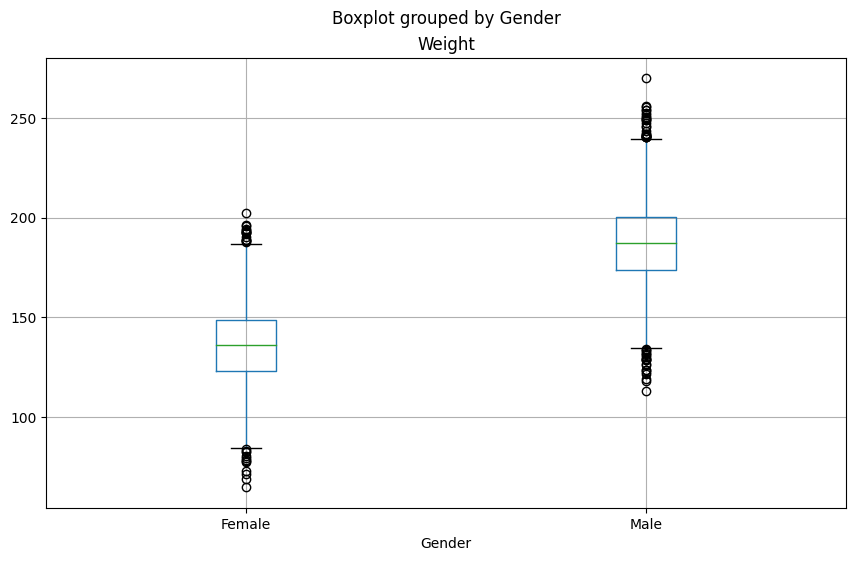

In [79]:
data.boxplot(column='Weight', by='Gender')

<Axes: title={'center': 'Height'}, xlabel='Gender'>

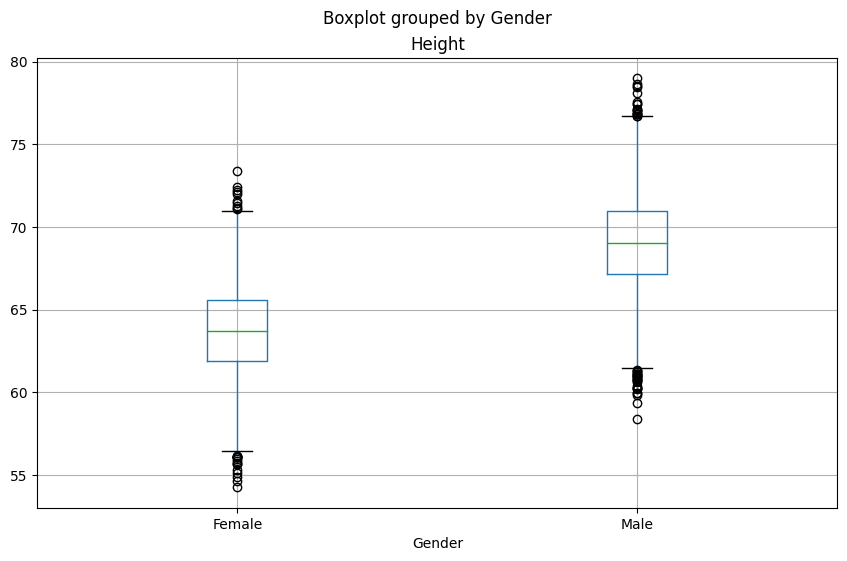

In [80]:
data.boxplot(column='Height', by='Gender')

In [81]:
data.groupby('Gender').describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

---


In [82]:
# Transformamos la variable objetivo a 1 y 0 (para clasificación)
data['Gender_int'] = data['Gender'].map({'Female': 0, 'Male': 1})

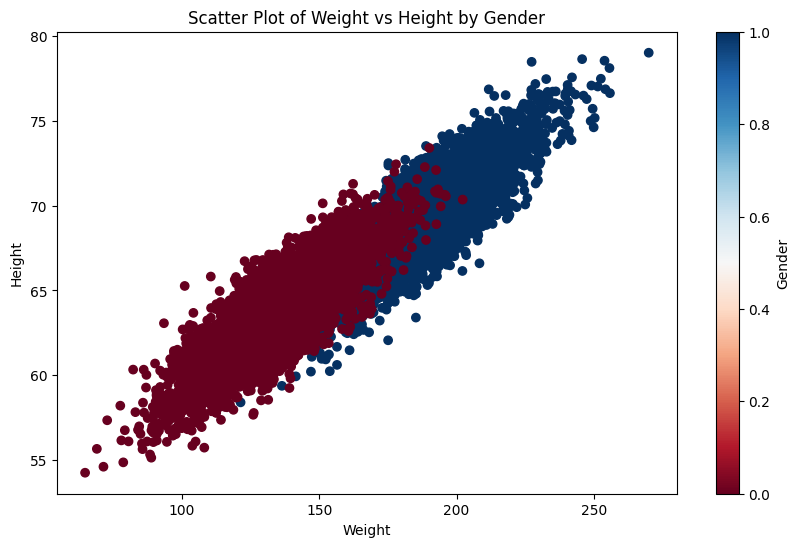

In [83]:
# Graficamos los datos con colores según el género
plt.scatter(data['Weight'], data['Height'], c=data['Gender_int'], cmap=plt.cm.RdBu)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter Plot of Weight vs Height by Gender')
plt.colorbar(label='Gender')
plt.show()


In [84]:
X = data[['Height', 'Weight']] # variables predictoras
y = data['Gender_int'] # variable objetivo

In [85]:
# Dividimos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

In [86]:
print(f'Tamaño de la muestra: {len(X)}')
print(f'Tamaño de la muestra: {len(X_train)}')
print(f'Tamaño de la muestra: {len(X_test)}')

Tamaño de la muestra: 10000
Tamaño de la muestra: 7000
Tamaño de la muestra: 3000


In [87]:
# Entrenar el modelo
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [88]:
# Realizamos la predicción
y_pred = clf.predict(X_test) # predicción categorica.

In [89]:
# Matriz de correlación
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[1369  131]
 [ 124 1376]]


In [90]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy)

precision = precision_score(y_test, y_pred)
print('Precision score:', precision)

recall = recall_score(y_test, y_pred)
print('Recall score:', recall)

auc_roc = roc_auc_score(y_test, y_pred)
print('AUC ROC score:', auc_roc)

Accuracy score: 0.915
Precision score: 0.9130723291307233
Recall score: 0.9173333333333333
AUC ROC score: 0.915


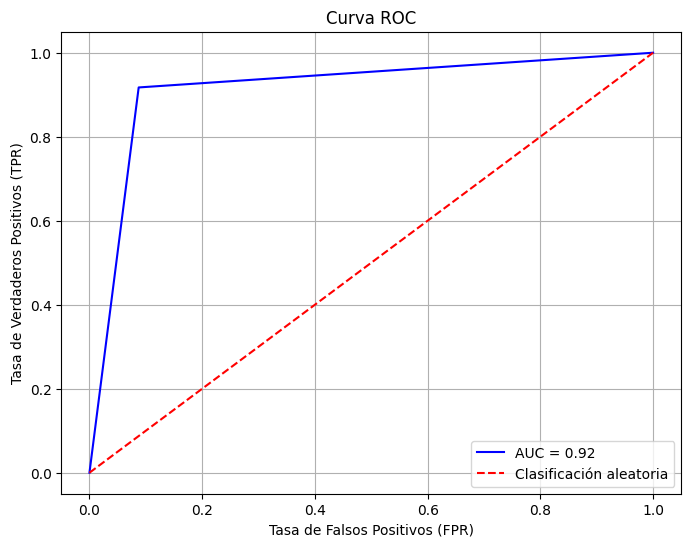

In [91]:
# 1. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# 2. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Clasificación aleatoria")
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()